# The Solow growth model

This post provides an example of the Solow growth model in the Black Rhino package. It will first cover the Solow model itself and how it is implemented in Black Rhino. Then, it will cover how to use Black Rhino to actually run the model and analyse the results.



## Configuring the model

In the Black Rhino framework, parameters are stored in xml files. Using this notebook, you can set change them. First, you need to import the elementree from the xml Python module.

In [16]:
import xml.etree.ElementTree as ET

Below you will find the parameter inputs for this model.  

In [17]:
parameter_values = (('num_sweeps', '30'),
                    ('num_simulations', '1'),
                    ('num_banks', '2'),
                    ('num_firms', '1'),
                    ('num_households', '2'),
                    ('bank_directory', 'agents/banks/'),
                    ('firm_directory', 'agents/firms/'),
                    ('household_directory', 'agents/households'),
                    ('measurement_config', 'measurements/test_output.xml')
                   )

To translate this to an xml document, which the framework can read, we first need create an ET element. 

In [18]:
environment = ET.Element('environment')

And create parameter elements and give them the values seen below to add to the tree object.

In [19]:
parameters = []
for x in range(len(parameter_values)):
    parameters.append(ET.SubElement(environment, 'parameter'))
    
for idx, p in enumerate(parameters):
    p.set('type', 'static')
    p.set('name', parameter_values[idx][0])
    p.set('value', parameter_values[idx][1])

This object can now be transformed to a string and written to an xml file using the code below. 

In [20]:
xml_params = ET.tostring(environment, encoding="UTF-8")
myfile = open("environments/solow_parameters.xml", "w")
myfile.write(xml_params)
myfile.close()

Now, the parameter xml file has been generated and the model can be run. Before, running the model, you need to import a couple of extra modules. These are the Python logging module, the Black Rhino environment class, and the Black Rhino runner class.

In [21]:
import logging
import os
from src.environment import Environment
from src.runner import Runner

Then, before running the model, the logger needs to be initialized.

In [22]:
log_directory = "log/"
identifier = "test_all_methods"
environment_directory = "environments/"
if not os.path.exists('log'):
    os.makedirs('log')
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    filename=log_directory + identifier + ".log", level=logging.INFO)
logging.info('START logging for run: %s',  environment_directory + identifier + ".xml")

First, the environment will be initialized. It contains the model parameters and variables. The environment also contains a list of agents. In the Solow model, the environment contains one bank, one firm, and one household. Finally, it also contains initialized transactions for these agents.

In [23]:
environment = Environment(environment_directory, identifier)

Next up, the runner object is created. As the name suggests, the runner object handles the running of the model. But that is not all, it also initializes the updater.

In [24]:
runner = Runner(environment)

Now you can actually run the model. Since the agent-based model is simulated using Monte Carlo methods. This means that the model will be run multiple times (num_simulations). For every simulation run, the environment and runner will be (re-)initialized. Then, the runner will run the Solow model. During the run, the runner will write data about capital to a csv file specified within the Measurement class and print out all the transactions happening and the books of firm and household at the end of each sweep.

In [25]:
for i in range(int(environment.num_simulations)):
    logging.info('  STARTED with run %s',  str(i))
    environment.initialize(environment_directory,  identifier)
    runner.initialize(environment)
    
    runner.do_run(environment)
    logging.info('  DONE')

measurements/test_output.xml
household_test_config_id_2s sold 11.2597930422d units of labour at a price 6.04737778052f to firm_test_config_id_1s at time 0d.
household_test_config_id_1s sold 14.2597930421d units of labour at a price 6.04737778052f to firm_test_config_id_1s at time 0d.
firm_test_config_id_1s sold 4.98553333539d units of goods at a price 10.0f to household_test_config_id_2s at time 0d.
firm_test_config_id_1s sold 6.07406133586d units of goods at a price 10.0f to household_test_config_id_1s at time 0d.
  <agent identifier='household_test_config_id_2'>
    <type value='household'>
    <parameter type='agent' name='active' value='0'></parameter>
    <parameter type='agent' name='labour' value='24.0'></parameter>
    <parameter type='agent' name='bank_acc' value='bank_test_config_id_2'></parameter>
    <parameter type='agent' name='propensity_to_save' value='0.4'></parameter>
        <transaction type='loans'>
            <property type='from' value='bank_test_config_id_2'></

So, now the model has been run, you will be able to analyse its outputs. If you are running the Ipython notebook to run the model. The following command will set the notebook to depict the output inside the noteobok. 

In [26]:
%matplotlib inline

Futhermore, you should import the modules to create graphs (matplotlib) and dataframes (pandas).

In [27]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt

Running the model has generated a csv file that contains its output. We can use pandas to read the csv.

In [28]:
solow_data = pd.read_csv('measurements/TestMeasurement.csv', index_col=0) 

The datafame looks as follows:

In [29]:
solow_data.head(3)

,House_1,House_2,Bank_1,Bank_2,Firm
Step,,,,,
1,68.092222,40.493742,34.855333,108.585964,49.855333
2,184.391854,82.670237,145.490446,267.062092,160.490446
3,324.400149,131.707342,340.130536,456.107491,355.130536


The Solow growth model is expected to produce an increase in total wealth that slows over time. In this version of the model, this means that there is deposit growth untill the equilibrium is reached. This is exactly what we observe.

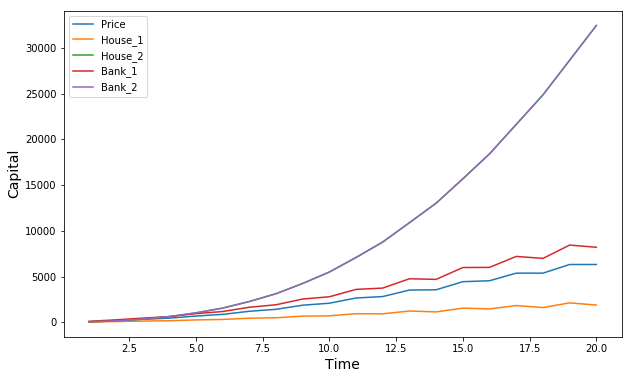

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

ax.plot(solow_data.index, solow_data)
ax.set_xlabel('Time', fontsize='14')
ax.set_ylabel('Capital', fontsize='14')
ax.legend(["Price", "House_1", "House_2", "Bank_1", "Bank_2", "Firm"])

fig.savefig('solow_capital.png')

This was an example of how to run one configuration of this model. The Black Rhino examples/solow folder contains three seperate notebooks for each of the elements of configuring the model, running the model, and analysing the results. For more advanced use, we recommend using these notebooks to run the model. 